# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.



## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';') #se utiliza sep=';' para obtener las columnas correctas ya que de lo contrario solo se obtiene una columna 
df_products = pd.read_csv('/datasets/products.csv',sep=';') 
df_aisles = pd.read_csv('/datasets/aisles.csv',sep=';') 
df_departments = pd.read_csv('/datasets/departments.csv',sep=';') 
df_order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
df_orders.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_aisles.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departments.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_order_products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Con el método 'info()' pudimos ver que al parecer no existen valores ausentes en los DataFrames, sin embargo cada uno de ellos tiene una cantidad de datos distintos, lo cual podría ser correcto en 'aisles' y 'departments', aunque en otros como 'order_products' y 'instacart_orders' esto podría indicar valores duplicados ya que ambos deberían tener valores similares al ser uno las ordenes y los productos, siendo además que en todo caso el DataFrame de 'order_products' debería tener más datos que 'instacart_orders' al ser el primero el desglose del último, indicando duplicados en 'order_products'

# Paso 2. Preprocesamiento de los datos

Preprocesar los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.



## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos. 

R = El primer paso para preprocesar los datos es identificar si se tienen datos nulos o duplicados, siendo que en este caso el problema principal aparente los datos duplicados los cuales pueden identificarse primero medainte el método unique(), y ser eliminados mediante drop() o bien reemplazados mediante replace() según sea el caso. Sin embargo, se deben identificar igualmente los datos nulos o con información errónea los cuales no hallan sido identificados por el método info(), siendo que se tendrá que evaluar si estos errores pueden ser reemplazados por un valor de media o mediana o bien ser directamnte eliminados si es que su elimincaión no afecta a los resultados del análsis  



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(df_orders.duplicated().sum()) #mediante duplicated y sum contamos el total de valores duplicados 
print(df_orders) #se imprime el dataset para verificar visualmente los valores duplicados e identifacar en que columna se encuentran 
print(df_orders.value_counts()) #revisamos value counts para identificar cuales son los duplicados 

# Revisa si hay pedidos duplicados


15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                    

En este caso encontramos que las líneas duplicadas son exactamente dos es decir al llamar al método duplicated() junto a sum(), tenemos que los duplicados son un total de 15 entre los 478952 totales, siendo que estos no se ven en cantidad al imprimir el dataframe e igualmente al llamar al método value_counts() tenemos que estos se repiten unicamente dos veces lo que en lugar de indicarnos una orden con datos, puede deberse a un error de sistema al registarse dos veces una misma orden. 

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m. 

orders_mier_2am = df_orders[(df_orders["order_dow"] == 3) & (df_orders["order_hour_of_day"] == 2)]
print(orders_mier_2am)
print(orders_mier_2am.value_counts())
print(orders_mier_2am.duplicated())
print(orders_mier_2am.duplicated().sum())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

 En este caso vemos que efectivamente tenemos valores duplicados siendo que estos se hallan celdas con dos valores iguales usando el método value.counts(), así como con el método duplicated observamaos que los duplicados se encuentran en este rango, al ser estos los 15 valores hallados anteriormente en el DataFrame lo que podría sugerir un error en el sistema de registro en esa hora y día específicos. 

In [10]:
df_orders.drop_duplicates(inplace=True)

# Elimina los pedidos duplicados


In [11]:
print(df_orders.duplicated().sum())
# Vuelve a verificar si hay filas duplicadas


0


In [12]:
print(df_orders.duplicated('order_id').sum())

# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0


Vimos los valores duplicados y se observó que los mismos se obtenían solo en un plazo específico de tiempo siendo los días miercoles a las 2.00 am. Al observar que estos datos solo se tenían en un plazo de tiempo específico y además eran muy pocos (solo 15), estos valores duplicados al eliminarlos no se afectan los valores finales de los datos, por ende estos pueden ser eliminados de manera segura, por lo cual se elimanaron medainte el método `'drop_duplicates()'`

### `products` data frame

In [13]:
print(df_products.duplicated())
print(df_products.duplicated().sum()) 
print(df_products)
# Verifica si hay filas totalmente duplicadas


0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool
0
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49

In [14]:
print(df_products.duplicated('department_id'))
print(df_products.duplicated('department_id').sum()) 
# Revisa únicamente si hay ID de departamentos duplicados


0        False
1        False
2        False
3        False
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool
49673


In [15]:
df_products['product_name'].str.upper()
print(df_products.duplicated('product_name'))
print(df_products.duplicated('product_name').sum())
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool
1257


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products[(df_products['product_name'].duplicated()) & ~(df_products['product_name'].isna())])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Observamos que los valores ausentes en este caso, son los valores duplicados, siendo que no se obtuvo valor alguno al filtrar los duplicados agregando la condición de valores no ausentes, por lo que se puede concluir que en este DataFrame no se tienen realmente valores de productos duplicados. 

### `departments` data frame

In [17]:
print(df_departments.duplicated())
print(df_departments.duplicated().sum())
print(df_departments)
# Revisa si hay filas totalmente duplicadas

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool
0
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli

In [18]:
print(df_departments.duplicated('department_id').sum())# Revisa únicamente si hay IDs duplicadas de productos

0


En este caso no hay departamentos duplicados lo cual es correcto ya que a diferencia de DataFrames anteriores donde varios productos u ordenes podían pertenecer a los defirentes departamentos, en este caso se obtiene 0 ya que los departamentos no deberían estar duplicados en la base de datos, ya que además no hubo alguna necesidad de cambiar los departamentos a mayusculas o minusculas. 

### `aisles` data frame

In [19]:
print(df_aisles.duplicated())
print(df_aisles.duplicated().sum())
print(df_aisles)
# Revisa si hay filas totalmente duplicadas

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool
0
     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [20]:
df_aisles['aisle'].str.lower()
print(df_aisles.duplicated('aisle'))
print(df_aisles.duplicated('aisle').sum())
print(df_aisles.value_counts())
print(df_aisles['aisle'].sort_values().unique())

# Revisa únicamente si hay IDs duplicadas de productos

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool
0
aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64
['air fresheners candles' 'asian foods' 'baby accessories'
 'baby bath body care' 'baby food formula' 'bakery desserts'
 'baking ingredients' 'baking supplies decor' 'beauty' 'beers coolers'
 'body lotions soap' 'bread' 'breakfast bakery' 'breakfast bars pastries'
 'bulk dried fruits vegetables' 'bulk gr

Igualmente en este DataFrame no se hallaron duplicados, siendo que se pasaron todos los datos a minusculas para confirmar si no existian errores haciendo lo mismo manualmente con el metodo unique()

### `order_products` data frame

In [21]:
print(df_order_products.duplicated())
print(df_order_products.duplicated().sum())
print(df_order_products)
# Revisa si hay filas totalmente duplicadas


0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool
0
         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products.duplicated('order_id')) 
print()
print(df_order_products.duplicated('order_id').sum())
print()
print(df_order_products['order_id'].value_counts())
print(df_order_products[(df_order_products["order_id"] == 61355)]) #se toma 61355 como muestra para verificar los datos de los duplicados


0          False
1          False
2          False
3          False
4          False
           ...  
4545002     True
4545003     True
4545004     True
4545005     True
4545006     True
Length: 4545007, dtype: bool

4094961

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64
         order_id  product_id  add_to_cart_order  reordered
57981       61355        5322                NaN          0
149404      61355       39475               45.0          0
247893      61355        8594                NaN          0
269840      61355       14233                5.0          0
345399      61355       24010               51.0          0
...           ...         ...                ...        ...
4426514     61355       29270               15.0          0
4482168     61355       24964               33.0          0
4515077     61355       

En este caso los duplicados no tendrían que ser elimindos, debido a que si bien hay valores repetidos en una columna a diferencia de duplicados anteriores donde la eliminación no afectaba la información dada, en este caso cada duplicado de la columna 'order_id' contiene información única importante para el el análisis, siendo que en tod caso, aquí se deberían eliminar los valorea ausentes,a para una mejor comprensión de los datos. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name' 
df_products.info()
print(df_products['product_name'].isna())
print(df_products['product_name'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool
1258


Observamos 1258 prodcutos nulos de un total de 49693, sin embargo los datos nulos se hallan solo en la coolumna 'product_name', basandonos en esto podemos deducir que por la cantidad de datos los valores ausentes no afectarían a los resultados finales, además de tener en cuenta que son variables categóricas lo que no haría posible reemplazarlas por una media o mediana de los demás datos. 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

id_100 = (df_products['product_name'].isna() & (df_products['aisle_id'] == 100))

print(id_100.sum())

1258


Al ver los hallazgos de este caso al sumar los valores que cumplian con ambas condiciones vemos que los 1258 valores ausentes se encuentran dentro de este pasillo al cumplir todos con las condiciones del filtrado. 

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
id_21= (df_products['product_name'].isna() & (df_products['department_id'] == 21))

print(id_21.sum())

1258


 En este caso vemos que al ser el total 1258, parece existir relación entre los valores ausentes con el pasillo al encontrarse además esta misma cantidad de valores ausentes en el pasillo 100. 

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
id_100_21 = []
id_100_21 = df_products[((df_products['aisle_id']==100) & (df_products['product_name'].isna())) & ((df_products['department_id']==21) & (df_products['product_name'].isna()))]
print(id_100_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


En este caso podemos ver que efectivamente los valores ausentes son aquellos dados en el pasillo 100 y el departamento 21, aquí observamos que estos valores ausentes pueden deberse a un error de regsitro, pero siendo que estos valores ausentes tienen datos de productos pueden ser reemplazados con la string alterna que indique que estos prodcutos no se hallaron. 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

print(df_products['product_name'].isna().sum())
print(df_products[(df_products['aisle_id']==100)  & (df_products['department_id']==21)])

0
       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_orders.info()
print(df_orders.isna())
print(df_orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False   

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
nan_value = (df_orders['days_since_prior_order'].isna() & (df_orders['days_since_prior_order'] == 1))
print(nan_value.sum())

0


Para este caso vemos que si bien el análisis inicial detecto los valores como ausentes vemos que en este caso al tener un código de 1 y 0, se detectaron los ceros como ausentes, pero la realidadad es que los valores cero solo reflejan una condición del pedido, por lo que para este caso podemos que este Datafarame no tiene en realidad valores ausentes. 

### `order_products` data frame

In [30]:
df_order_products.info()
print(df_order_products.isna())
print()
print(df_order_products.isna().sum())
print() 
print(df_order_products.sample(40))
# Encuentra los valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              F

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min()) 
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


En este caso observamos que el mínimo es 1 el máximo 64, por lo cual a diferencia de otros dataframes donde teníamos valores ausentes que podían indicar algún dato, para esta ocasión no se puede aplicar dichos criterios a los valores ausentes ya que al no contener un cero se deben como valores ausentes buscando su eliminación o reemplazo según se vea en el caso. 

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(order_id_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print('Primer filtrado')
df_order_id_nan = df_order_products[df_order_products['order_id'].isin(order_id_nan)]
print(df_order_id_nan)
print ('***************')
print('Agrupar todos los pedidos con datos ausentes por su ID')
order_group = df_order_id_nan.groupby('order_id')
print(order_group)
print ('***************')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print('Contar el número de product_id')
numero_product_id = ((order_group['product_id']).count())
print(numero_product_id)
print ('***************') 
print('Revisar el valor mínimo del conteo')
print(numero_product_id.min())


Primer filtrado
         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]
***************
Agrupar todos los pedidos con datos ausentes por su ID
***************
Contar el número de product_id
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735

Observamos que el valor del minimo del conteo es 65, pro lo cual vemos que en efecto todos los pedidos con valores ausentes contienen más de 65 productos. 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999,inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Se identificaron los valores ausentes, en este caso los productos tenían más productos que el valor máximo que es 64, siendo que estos valores ausentes no se pueden indetificar adecaudamente con una media, se reemplazan por 999 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
En este caso vimos la importancia de revisar los valores ausentes y duplicados de los datos, siendo que el hecho de tenerlos no siempre indica que estos se deban directamente reemplazar o eliminar, como se pudo constar, había ocasiones sobre todo en los datos duplicados donde estos debían dejarse tal cual ya que representaban datos importantes, o bien según la organización del DataFrame estos no eran duplicados tal cual sino datos reales con información adicional. En el tema de los datos ausentes concluimos la importancia de tener herrameintas para lograr el método correcto de gestión de valores ausentes ya sea mediante el reemplazo o la eliminación directa, según se tenga una anaálisis que permita limpiar los datos sin perder información valiosa. 

# Paso 3. Análisis de los datos



# Sección [A] 

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
valor_razonable = (df_orders[(df_orders['order_hour_of_day'] >= 0) & (df_orders['order_hour_of_day'] <= 23)])
print(valor_razonable['order_hour_of_day'].sum())
print(df_orders['order_hour_of_day'].sum())

6440484
6440484


In [36]:
valor_razonable2 = (df_orders[(df_orders['order_dow'] >= 0) & (df_orders['order_dow'] <= 6)])
print(valor_razonable2['order_dow'].sum())
print(df_orders['order_dow'].sum())

1329116
1329116


Observamos que el número los campos de totales y filtrados cóincide por lo cual podemos concluir que todos los valores consultados dentro del DataFrame son razonables. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

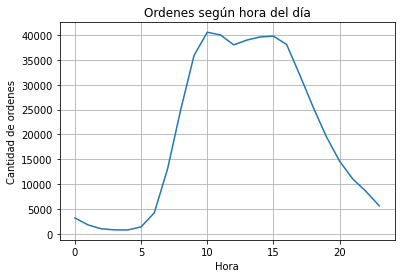

In [37]:
 

grafic_data= df_orders.groupby('order_hour_of_day')['order_id'].count()
grafic_data.plot(xlabel= 'Hora',
     ylabel= 'Cantidad de ordenes',
     title ='Ordenes según hora del día',
     grid=True)                                      
                                      
                                       
                                       
                                      


plt.show()

En el gráfico podemos observar que la hora donde más se realizan órdenes es a las 10.00 horas seguido de las 15.00 horas

### [A3] ¿Qué día de la semana compran víveres las personas?

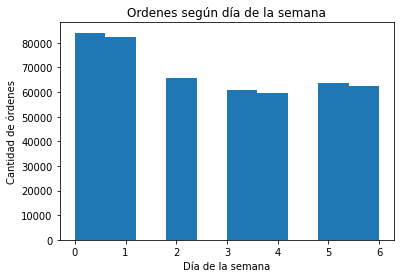

In [38]:
hist = df_orders['order_dow'].plot(x='order_dow',y = 'order_number',title ='Ordenes según día de la semana',kind='hist')
hist.set_xlabel('Día de la semana')
hist.set_ylabel('Cantidad de órdenes') 
plt.show()

Podemos observar que los días en los que más se piden víveres es domingo y lunes, siendo esto esperado pues es al inicio de la semana que se espera la gente se surta de víveres para el resto de la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

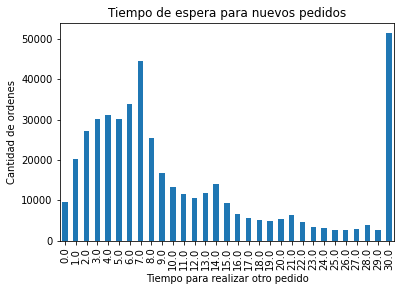

In [39]:
df_days= df_orders.groupby('days_since_prior_order')['user_id'].count()
df_days.plot(xlabel= 'Tiempo para realizar otro pedido',
             ylabel= 'Cantidad de ordenes',
             title ='Tiempo de espera para nuevos pedidos', 
             kind='bar')                                      
                                      


plt.show()

La mayoría de las personas esperan hasta 30 días para realzar un nuevo pedido lo que indica que se tiene un consumo mensual regular, seguido de 7 días lo que indica un consumo msemanal, los valores mínimos son entre los 25 y 27 días lo que indica pedidos mensuales con menor frecuencia.

# Sección [B] 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

In [40]:
hour_day_data = df_orders[(df_orders['order_dow'] == 6) | (df_orders['order_dow']==3)]

In [41]:
hour_day = hour_day_data.pivot_table(columns='order_dow',
                                          values='order_id',
                                          index='order_hour_of_day',
                                          aggfunc= 'count')

In [42]:
print(hour_day)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


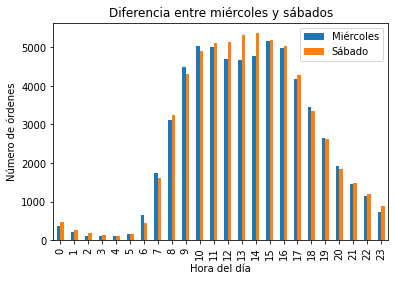

In [43]:
hour_day.plot(kind ='bar',
             title = 'Diferencia entre miércoles y sábados',
             xlabel= 'Hora del día',
             ylabel= 'Número de órdenes')
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Observmos que los días miércoles y sábado por lo general siguen una misma tendencia, sin embargo entre las 12 y 14 horas vemos un aumento más o menos considerable los días sábado 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
pedidos_cliente = df_orders.groupby(by='user_id')['order_id'].count()
print(pedidos_cliente)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64


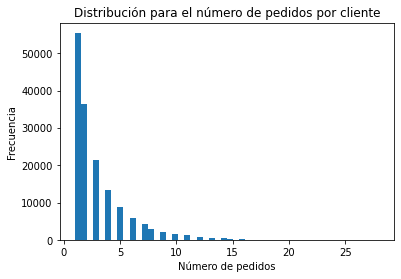

In [45]:
hist_pedidos = pedidos_cliente.plot(kind='hist',
                     title= 'Distribución para el número de pedidos por cliente',
                     bins = 50)
hist_pedidos.set_xlabel('Número de pedidos')
hist_pedidos.set_ylabel('Frecuencia')
plt.show()

Podemos ver que la distribución de pedidos es mayor en el primer rango de pedidos de los clientes, lo que indica la frecuencia de pedidos de los clientes positiva al estar con los valores atípicos a la derecha, siendo que la mayoría de los cientes realiza de 0a 3 pedidos

### [B3] ¿Cuáles son los 20 productos más popular (ID y nombre)?

In [46]:
df_merge = df_order_products.merge(df_products, how ='inner', on = 'product_id')
products = df_merge.groupby('product_id').count().sort_values(by = 'product_name', ascending = False).head(20)
product_id = products.reset_index()
print(product_id)

    product_id  order_id  add_to_cart_order  reordered  product_name  \
0        24852     66050              66050      66050         66050   
1        13176     53297              53297      53297         53297   
2        21137     37039              37039      37039         37039   
3        21903     33971              33971      33971         33971   
4        47209     29773              29773      29773         29773   
5        47766     24689              24689      24689         24689   
6        47626     21495              21495      21495         21495   
7        16797     20018              20018      20018         20018   
8        26209     19690              19690      19690         19690   
9        27845     19600              19600      19600         19600   
10       27966     19197              19197      19197         19197   
11       22935     15898              15898      15898         15898   
12       24964     15292              15292      15292         1

In [47]:
df_merge2 = df_order_products.merge(df_products, how = 'inner', on = 'product_id')
_id = df_merge2.groupby('product_name').count().sort_values(by = 'product_id', ascending = False).head(20)
product_name = _id.reset_index()
print(product_name)

                product_name  order_id  product_id  add_to_cart_order  \
0                     Banana     66050       66050              66050   
1     Bag of Organic Bananas     53297       53297              53297   
2       Organic Strawberries     37039       37039              37039   
3       Organic Baby Spinach     33971       33971              33971   
4       Organic Hass Avocado     29773       29773              29773   
5            Organic Avocado     24689       24689              24689   
6                Large Lemon     21495       21495              21495   
7               Strawberries     20018       20018              20018   
8                      Limes     19690       19690              19690   
9         Organic Whole Milk     19600       19600              19600   
10       Organic Raspberries     19197       19197              19197   
11      Organic Yellow Onion     15898       15898              15898   
12            Organic Garlic     15292       15292 

In [48]:
df_concat = pd.concat([product_id['product_id'],product_name['product_name']], axis='columns')
print(df_concat)

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


En este ejercicio se observa que los productos más pedidos son principalmente frutas o productos perecederos, siendo la leche orgánica el único alimento empaquetado y procesado. 

# Sección [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
df_articulos = df_order_products.groupby('order_id')

In [50]:
df_art_por_pedido = df_articulos.count()
print(df_art_por_pedido) 
print(df_art_por_pedido.mean())

          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
...              ...                ...        ...
3421034           17                 17         17
3421053            9                  9          9
3421071            5                  5          5
3421077            4                  4          4
3421079            1                  1          1

[450046 rows x 3 columns]
product_id           10.098983
add_to_cart_order    10.098983
reordered            10.098983
dtype: float64


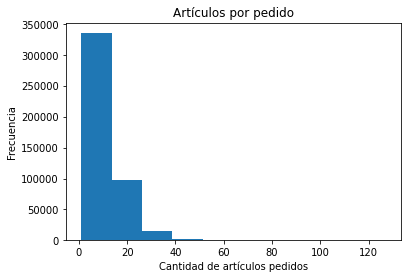

In [51]:
hist_artículos = df_art_por_pedido['product_id'].plot(kind='hist',
                                      bins= 10,
                                     title='Artículos por pedido',
                                     ) 
hist_artículos.set_xlabel('Cantidad de artículos pedidos')
hist_artículos.set_ylabel('Frecuencia')
plt.show()

 Vemos que las personas normalmente compran entre 0 y 10 artículos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
df_merge3 = df_order_products.merge(df_products, how ='inner', on = 'product_id')
products2 = df_merge3.groupby('product_id').count().sort_values(by = 'product_name', ascending = False)
productos_reorder = products.reset_index()
print(productos_reorder)

    product_id  order_id  add_to_cart_order  reordered  product_name  \
0        24852     66050              66050      66050         66050   
1        13176     53297              53297      53297         53297   
2        21137     37039              37039      37039         37039   
3        21903     33971              33971      33971         33971   
4        47209     29773              29773      29773         29773   
5        47766     24689              24689      24689         24689   
6        47626     21495              21495      21495         21495   
7        16797     20018              20018      20018         20018   
8        26209     19690              19690      19690         19690   
9        27845     19600              19600      19600         19600   
10       27966     19197              19197      19197         19197   
11       22935     15898              15898      15898         15898   
12       24964     15292              15292      15292         1

In [53]:
df_merge4 = df_order_products.merge(df_products, how = 'inner', on = 'product_id')
id_2 = df_merge4.groupby('product_name').count().sort_values(by = 'product_id', ascending = False)
reorder_id = id_2.reset_index()
print(reorder_id)

                              product_name  order_id  product_id  \
0                                   Banana     66050       66050   
1                   Bag of Organic Bananas     53297       53297   
2                     Organic Strawberries     37039       37039   
3                     Organic Baby Spinach     33971       33971   
4                     Organic Hass Avocado     29773       29773   
...                                    ...       ...         ...   
44609              Beef Broth 99% Fat Free         1           1   
44610     Classic Hazelnut Flavoring Syrup         1           1   
44611  Tomato Basil Penne Hamburger Helper         1           1   
44612                 Classic Frankfurters         1           1   
44613                        Heart Cookies         1           1   

       add_to_cart_order  reordered  aisle_id  department_id  
0                  66050      66050     66050          66050  
1                  53297      53297     53297          53

In [54]:
reorder_df = pd.concat([productos_reorder['product_id'],reorder_id['product_name'],df_order_products['reordered']], axis='columns')
print(reorder_df)


         product_id            product_name  reordered
0           24852.0                  Banana          0
1           13176.0  Bag of Organic Bananas          1
2           21137.0    Organic Strawberries          1
3           21903.0    Organic Baby Spinach          1
4           47209.0    Organic Hass Avocado          1
...             ...                     ...        ...
4545002         NaN                     NaN          1
4545003         NaN                     NaN          0
4545004         NaN                     NaN          1
4545005         NaN                     NaN          1
4545006         NaN                     NaN          0

[4545007 rows x 3 columns]


In [55]:

print(reorder_df[reorder_df['reordered'] == 1].head(20))

    product_id                product_name  reordered
1      13176.0      Bag of Organic Bananas          1
2      21137.0        Organic Strawberries          1
3      21903.0        Organic Baby Spinach          1
4      47209.0        Organic Hass Avocado          1
5      47766.0             Organic Avocado          1
6      47626.0                 Large Lemon          1
7      16797.0                Strawberries          1
8      26209.0                       Limes          1
9      27845.0          Organic Whole Milk          1
10     27966.0         Organic Raspberries          1
12     24964.0              Organic Garlic          1
14     39275.0         Organic Blueberries          1
15     49683.0              Cucumber Kirby          1
16     28204.0          Organic Fuji Apple          1
17      5876.0               Organic Lemon          1
19     40706.0      Organic Grape Tomatoes          1
20         NaN         Seedless Red Grapes          1
22         NaN            Ho

En este caso vemos que los produtos más pedidos no son necesariamente los que se vuelven a pedir, siendo que la tendencia en este caso es volver a pedir prodcutos orgánicos, lo que nos indica una predilección por prodcutos orgánicos 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
df_productos = df_order_products.merge(df_products,how='inner', on='product_id')

In [57]:
df_1 = df_productos.groupby(by = ['product_id','product_name']).mean().reset_index()

In [58]:
print(df_1[['product_id','product_name','reordered']])
df_times= df_1[['reordered']]
print(df_times.mean())

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reordered  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
4       0.500000  
...          ...  
45

 Para este caso vemos que la tasa de veces que se pide un articulo y se vuelve a pedir es del 38% 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
df_merged = df_orders.merge(df_order_products, how  = 'inner', on= 'order_id')

In [60]:
df_2= df_merged.groupby(by='user_id').mean().reset_index()
print(df_2[['user_id','reordered']])
print(df_2[['reordered']].mean())

        user_id  reordered
0             2   0.038462
1             4   0.000000
2             5   0.666667
3             6   0.000000
4             7   0.928571
...         ...        ...
149621   206203   0.222222
149622   206206   0.714286
149623   206207   0.891304
149624   206208   0.696000
149625   206209   0.320000

[149626 rows x 2 columns]
reordered    0.494853
dtype: float64


 Para la mayoría de los clientes tenemos que aproxiamdamente el 49% de los productos ya habían sido pedidos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
cart_order = df_order_products[df_order_products['add_to_cart_order'] == 1]
cart_order_groupby = cart_order.groupby('product_id').count().reset_index()

In [62]:
cart_order_sorted = cart_order_groupby.sort_values(by = 'order_id', ascending = False).head(20)
cart_products_merge = cart_order_sorted.merge(df_products, how='inner', on='product_id')

In [63]:
articulos_cart_20 = cart_products_merge[['product_id','product_name','order_id']]
print(articulos_cart_20)

    product_id                 product_name  order_id
0        24852                       Banana     15562
1        13176       Bag of Organic Bananas     11026
2        27845           Organic Whole Milk      4363
3        21137         Organic Strawberries      3946
4        47209         Organic Hass Avocado      3390
5        21903         Organic Baby Spinach      3336
6        47766              Organic Avocado      3044
7        19660                 Spring Water      2336
8        16797                 Strawberries      2308
9        27966          Organic Raspberries      2024
10       44632   Sparkling Water Grapefruit      1914
11       49235          Organic Half & Half      1797
12       47626                  Large Lemon      1737
13         196                         Soda      1733
14       38689     Organic Reduced Fat Milk      1397
15       26209                        Limes      1370
16       12341                Hass Avocados      1340
17        5785  Organic Redu

Escribe aquí tus conclusiones. Vemos que los artículos que se agregan primero al carrito de compra, son por lo común también los más pedidos y aquellos que por lo común se reordenan. 

### Conclusion general del proyecto:

En este proyecto se observaron las tendencias de compra de la plataforma Instacart, donde después de realizar una limpieza de datos a través de eliminación y reemplazo de datos duplicados y ausentes pudimos identificar varias tendencias. 
En primer lugar vimos que las personas suelen realizar sus pedidos de manera mensual, principalmente a las 10.00 y 15.00 horas, comunmente al inicio de la semana el domingo y lunes. 
Finalmente vemos que los productos predilectos tanto para reorden como en preferencia para añadir por primera vez al carrito de compras, son normalemnte frutos orgánicos, siendo el primer producto más solictado las bananas